In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


데이타 생성

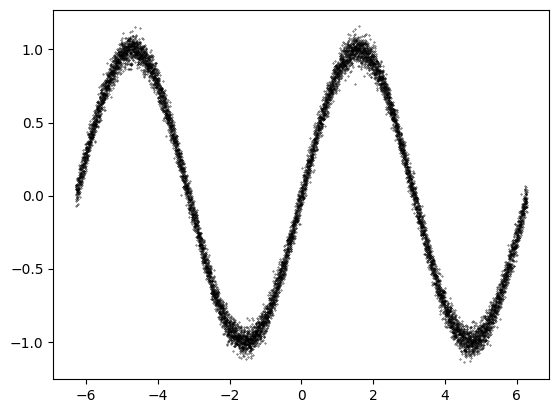

In [2]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05*np.random.normal(size=[len(inputs), 1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [3]:
model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [4]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(inputs, outputs, epochs=20)

Epoch 1/20
313/313 [==============================] - 2s 2ms/step - loss: 0.3074 - mae: 0.3074
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1554 - mae: 0.1554
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1391 - mae: 0.1391
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1239 - mae: 0.1239
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1067 - mae: 0.1067
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0913 - mae: 0.0913
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0725 - mae: 0.0725
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0604 - mae: 0.0604
Epoch 9/20
313/313 [==============================] - 1s 4ms/step - loss: 0.0544 - mae: 0.0544
Epoch 10/20
313/313 [==============================] - 2s 7ms/step - loss: 0.0523 - mae: 0.0523
Epoch 11/20
313/313 [============================

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
test_loss, test_mae = test_output_pred = model.evaluate(inputs,outputs, verbose = 0) # 언패킹
print(test_loss, test_mae)

0.04552025720477104 0.04552025720477104


313/313 [==============================] - 0s 812us/step


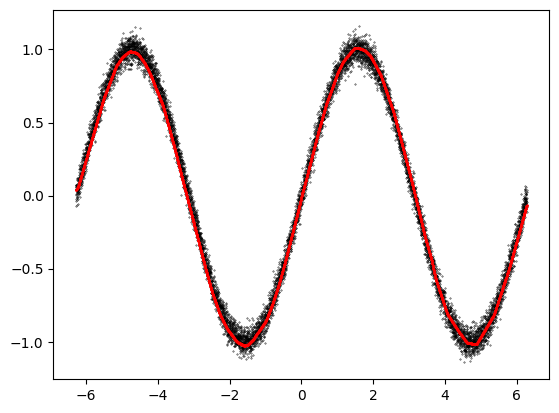

In [7]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1) # s = size
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)